In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gseapy as gp
import scanpy as sc

gp.__version__


'1.0.5'

In [2]:
# reading data
sc_data = sc.read_h5ad('/mnt/c/Users/ouyangkang/Desktop/convert_sc_data.h5ad')
sc_data.obs.head()

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,cell,pANN,library,RNA_snn_res.0.5,seurat_clusters,collected_time,infer_age,infer_age_int,tissue_old,sub_cluster_number,celltype,tissue_update,germ_layer,subtype
index,,,,,,,,,,,,,,,,,,
CELL344_N2_1_1,V2R2209070002,10099.0,2392,1.089217,CELL344_N2_1_1,0.249983031290301,V2R2209070002,13.0,13,E12-14h,12.634391,13.0,CNS,5,glia,CNS,neuroectoderm,chiasm glia
CELL345_N1_1_1,V2R2209070002,3928.0,1049,0.712831,CELL345_N1_1_1,0.249983031290301,V2R2209070002,4.0,4,E12-14h,12.707846,13.0,hemolymph,2,plasmatocytes,hemolymph,mesoderm,plasmatocytes
CELL346_N3_1_1,V2R2209070002,7762.0,2243,0.979129,CELL346_N3_1_1,0.249983031290301,V2R2209070002,24.0,24,E12-14h,14.176962,14.0,midgut,2,entero-endocrine cells,midgut,endoderm,entero-endocrine cells (Mip+)
CELL347_N2_1_1,V2R2209070002,21023.0,2147,0.756315,CELL347_N2_1_1,0.249983031290301,V2R2209070002,10.0,10,E12-14h,16.564274,17.0,epidermis,1,epidermal epithelium,epidermis,ectoderm,epidermal epithelium
CELL348_N1_1_1,V2R2209070002,2809.0,617,1.637593,CELL348_N1_1_1,0.249983031290301,V2R2209070002,4.0,4,E12-14h,12.707846,13.0,hemolymph,2,plasmatocytes,hemolymph,mesoderm,plasmatocytes


In [3]:
sc_data.layers['counts'] = sc_data.X

In [4]:
# preprocessing but don't need normalization
sc.pp.log1p(sc_data)
sc_data.layers['lognorm'] = sc_data.X

In [5]:
sc_data.obs.groupby('celltype')['seurat_clusters'].value_counts()

celltype                    seurat_clusters
AMP/EE progenitors          24                  270
                            7                    62
                            22                    6
CNS primordium              40                  360
Malpighian tubule           19                 2692
                                               ... 
visceral muscle             8                     7
visceral muscle primordium  11                 1000
                            8                    36
                            30                   30
yolk                        39                  723
Name: seurat_clusters, Length: 250, dtype: int64

In [6]:
# extract some part data for tring
try_data = sc_data[sc_data.obs.seurat_clusters.isin(['40', '41'])].copy()
try_data

AnnData object with n_obs × n_vars = 1430 × 16725
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'cell', 'pANN', 'library', 'RNA_snn_res.0.5', 'seurat_clusters', 'collected_time', 'infer_age', 'infer_age_int', 'tissue_old', 'sub_cluster_number', 'celltype', 'tissue_update', 'germ_layer', 'subtype'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'log1p'
    obsm: 'X_harmony', 'X_pca', 'X_scvi', 'X_umap'
    layers: 'counts', 'lognorm'

In [7]:
gene_sets = gp.get_library_name(organism="fly")

In [8]:
import time
t1 = time.time()

res = gp.gsea(data=try_data.to_df().T,
              gene_sets=gene_sets,
              cls=try_data.obs.seurat_clusters,
              permutation_num=1000,
              permutation_type='phenotype',
              outdir=None,
              method='s2n',
              threads=16)
t2=time.time()
print(t2-t1)

2023-08-01 20:52:20,214 [ERROR] No supported gene_sets: Allele_LoF_Phenotypes_from_FlyBase_2017
2023-08-01 20:52:22,914 [ERROR] No supported gene_sets: Allele_Phenotypes_from_FlyBase_2017
2023-08-01 20:52:25,689 [ERROR] No supported gene_sets: Anatomy_AutoRIF
2023-08-01 20:52:27,941 [ERROR] No supported gene_sets: Anatomy_AutoRIF_Predicted_zscore
2023-08-01 20:52:30,883 [ERROR] No supported gene_sets: Anatomy_GeneRIF
2023-08-01 20:52:34,397 [ERROR] No supported gene_sets: Anatomy_GeneRIF_Predicted_zscore
2023-08-01 20:52:36,033 [ERROR] No supported gene_sets: Coexpression_Predicted_GO_Biological_Process_2018
2023-08-01 20:52:41,022 [ERROR] No supported gene_sets: Coexpression_Predicted_GO_Cellular_Component_2018
2023-08-01 20:52:45,902 [ERROR] No supported gene_sets: Coexpression_Predicted_GO_Molecular_Function_2018
2023-08-01 20:52:47,891 [ERROR] No supported gene_sets: GO_Biological_Process_AutoRIF
2023-08-01 20:52:52,284 [ERROR] No supported gene_sets: GO_Biological_Process_AutoRIF_

134.68793940544128


In [9]:
res.res2d.head(10)

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,gsea,GO_Cellular_Component_2018__mitochondrion (GO:...,0.704235,2.099697,0.001919,0.002189,0.002,13/16,19.39%,COX5B;COX7C;OXA1L;TFAM;MTPAP;CRAT;ECSIT;L2HGDH...
1,gsea,GO_Molecular_Function_2018__transcription coac...,-0.658012,-1.904306,0.004175,0.026902,0.013058,14/15,31.22%,MED26;MED21;MED7;MED14;MED17;MED27;MED31;MED24...
2,gsea,GO_Biological_Process_2018__regulation of tran...,-0.556443,-1.856059,0.002123,0.021671,0.023939,21/29,32.42%,AGO1;AGO2;MED26;MED19;BRWD3;HDAC1;MED21;MED7;M...
3,gsea,GO_Biological_Process_2018__positive regulatio...,-0.598698,-1.855426,0.004073,0.014945,0.023939,17/21,31.22%,AGO1;AGO2;MED19;RYBP;HDAC1;MED21;MED14;MED17;P...
4,gsea,GO_Biological_Process_2018__positive regulatio...,-0.643818,-1.833289,0.008247,0.015693,0.031556,9/15,19.59%,AGO1;AGO2;MED19;HDAC1;MED21;SCAP;MED14;MED17;H...
5,gsea,GO_Biological_Process_2018__regulation of tran...,-0.546251,-1.821823,0.008421,0.012853,0.032644,23/30,32.42%,MED26;RYBP;BRWD3;HDAC1;MED21;MED7;MED14;MED17;...
6,gsea,GO_Biological_Process_2018__transcription from...,-0.57164,-1.783361,0.012474,0.014198,0.040261,17/20,36.04%,MED26;MED7;MED15;MED14;MED17;MED27;PCID2;MED31...
7,gsea,GO_Biological_Process_2018__transcription init...,-0.579489,-1.741322,0.012552,0.019856,0.05876,15/17,36.04%,MED26;MED7;MED15;MED14;MED17;MED27;MED31;MED24...
8,gsea,GO_Biological_Process_2018__DNA-templated tran...,-0.484274,-1.517928,0.096842,0.090794,0.211099,16/19,36.04%,MED26;MED7;MED15;MED14;MED17;MED27;TAF1B;MED31...
9,gsea,GO_Molecular_Function_2018__RNA binding (GO:00...,-0.469236,-1.498643,0.094845,0.090171,0.232862,11/21,24.35%,AGO1;AGO2;LRP1;DCP2;AGO3;HUWE1;ADD1;LBR;PCID2;...


In [10]:
res.ranking.shape

(13994,)

In [11]:
res.res2d.Term.iloc[0]

'GO_Cellular_Component_2018__mitochondrion (GO:0005739)'

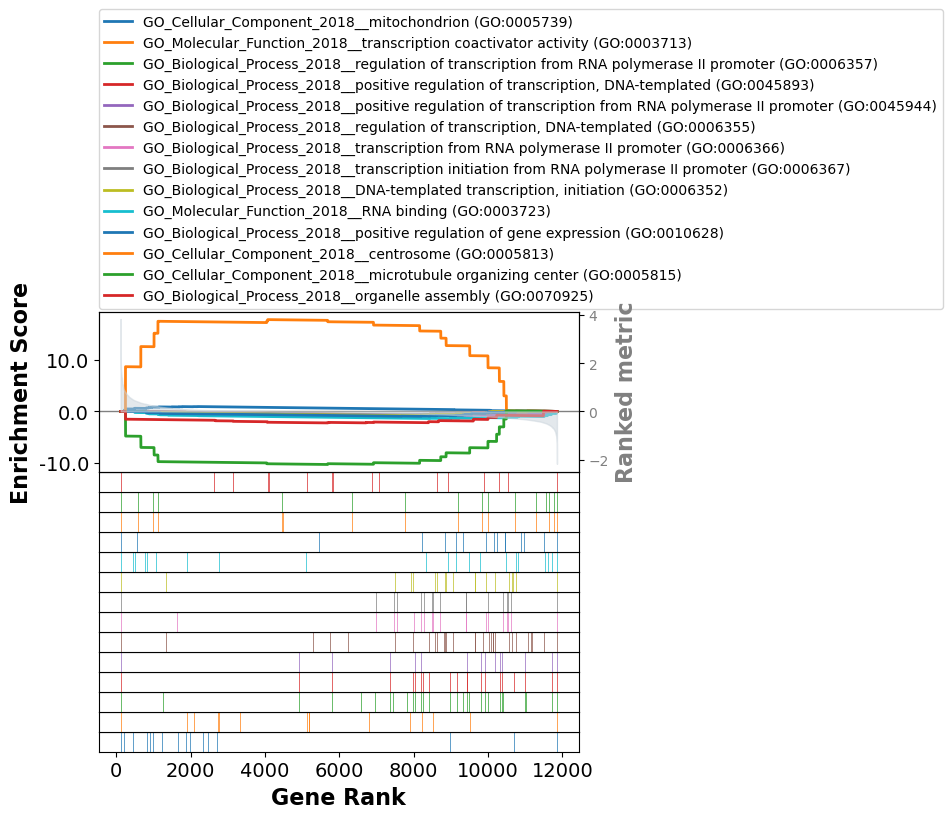

In [12]:
term = res.res2d.Term

axs = res.plot(terms=term)

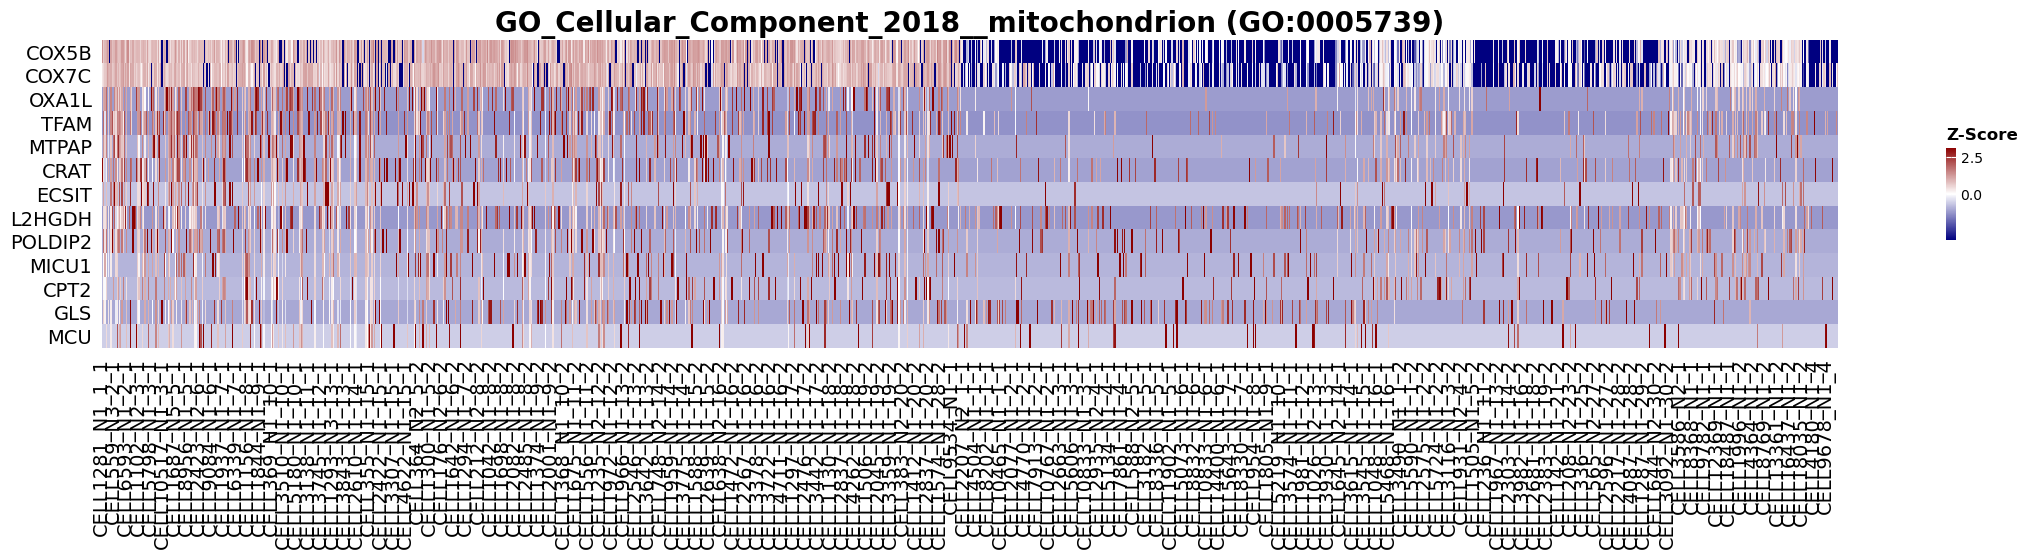

In [13]:
from gseapy import heatmap
genes = res.res2d.Lead_genes[0].split(';')
ax = heatmap(res.heatmat.loc[genes], z_score=0, title=term[0], figsize=(28,4))

# 2. DEG analysis

In [14]:
sc.tl.rank_genes_groups(try_data,
                        groupby='seurat_clusters',
                        use_raw=False,
                        layer='lognorm',
                        method='wilcoxon',
                        groups=['40'])

In [15]:
try_data.X.max()

2.1104722

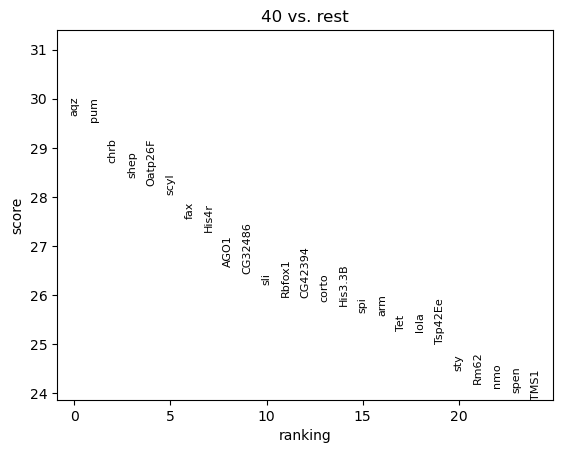

In [16]:
sc.pl.rank_genes_groups(try_data, n_genes=25, sharey=False)

In [17]:
result = try_data.uns['rank_genes_groups']
groups = result['names'].dtype.names
degs = pd.DataFrame(
    {group + '_' + key:result[key][group]
     for group in groups for key in ['names','scores', 'pvals','pvals_adj','logfoldchanges']}
)

In [18]:
degs

,40_names,40_scores,40_pvals,40_pvals_adj,40_logfoldchanges
0,aqz,29.659777,2.537134e-193,3.536131e-190,2.418362
1,pum,29.531246,1.143502e-191,1.195317e-188,4.016611
2,chrb,28.696030,4.276343e-181,2.750840e-178,3.136262
3,shep,28.388889,2.773169e-177,1.546042e-174,3.174566
4,Oatp26F,28.217325,3.584738e-175,1.816811e-172,10.431295
...,...,...,...,...,...
16720,ATPsynbeta,-31.508053,6.738294e-218,2.253959e-214,-1.496577
16721,CG6933,-31.697165,1.699906e-220,7.107732e-217,-8.863368
16722,Acbp4,-31.916056,1.598848e-223,8.913577e-220,-7.566109
16723,Pebp1,-32.075005,9.839727e-226,8.228472e-222,-7.119151


In [19]:
degs_sig = degs[degs['40_pvals_adj'] < 0.05]
degs_up = degs_sig[degs_sig['40_logfoldchanges'] > 0]
degs_down = degs_sig[degs_sig['40_logfoldchanges'] < 0]

In [20]:
print(degs_up.shape)
print(degs_down.shape)

(2542, 5)
(2288, 5)


In [21]:
enr_up = gp.enrichr(degs_up['40_names'],
                           gene_sets = 'GO_Biological_Process_2021',
                           outdir='/mnt/c/Users/ouyangkang/Desktop/')

ValueError: Warning: No enrich terms when cutoff = 0.05

In [106]:
enr_up.res2d.Term = enr_up.res2d.Term.str.split(" \(GO").str[0]

In [107]:
enr_up.res2d

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2021,positive regulation of mRNA binding,5/7,0.000554,0.999996,0,0,17.209188,1.290317e+02,CDK9;FMR1;EIF3E;EIF3C;EIF4G1
1,GO_Biological_Process_2021,axon choice point recognition,4/5,0.001168,0.999996,0,0,27.525424,1.858620e+02,ROBO2;APP;ROBO3;ROBO1
2,GO_Biological_Process_2021,miRNA loading onto RISC involved in gene silen...,4/7,0.006612,0.999996,0,0,9.174090,4.604402e+01,AGO3;AGO1;AGO2;ADAR
3,GO_Biological_Process_2021,positive regulation of histone H3-K9 methylation,4/7,0.006612,0.999996,0,0,9.174090,4.604402e+01,RIF1;MYB;JARID2;SIRT1
4,GO_Biological_Process_2021,regulation of mRNA binding,3/5,0.016784,0.999996,0,0,10.317376,4.217026e+01,FMR1;EIF3E;EIF3C
...,...,...,...,...,...,...,...,...,...,...
2490,GO_Biological_Process_2021,response to lipid,1/114,0.999996,0.999996,0,0,0.060435,2.320964e-07,FER
2491,GO_Biological_Process_2021,calcium ion transport,1/115,0.999996,0.999996,0,0,0.059901,2.293471e-07,ANK2
2492,GO_Biological_Process_2021,cellular amide metabolic process,1/115,0.999996,0.999996,0,0,0.059901,2.293471e-07,PC
2493,GO_Biological_Process_2021,sphingolipid metabolic process,1/116,0.999996,0.999996,0,0,0.059377,2.268211e-07,PPT1


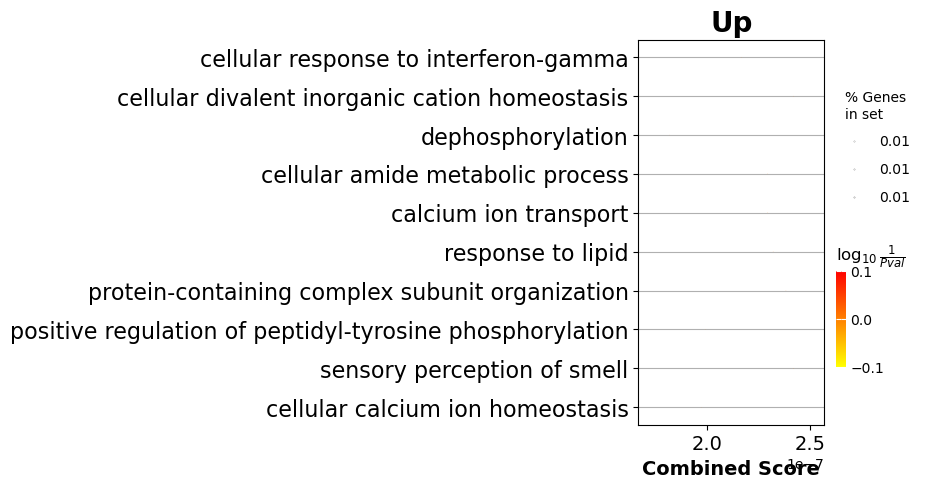

In [116]:
gp.dotplot(enr_up.res2d, figsize=(3,5), title="Up", cmap = plt.cm.autumn_r, cutoff=1)
plt.show()

In [22]:
enr_down = gp.enrichr(degs_down['40_names'],
                      gene_sets='GO_Biological_Process_2021',
                      outdir='/mnt/c/Users/ouyangkang/Desktop')


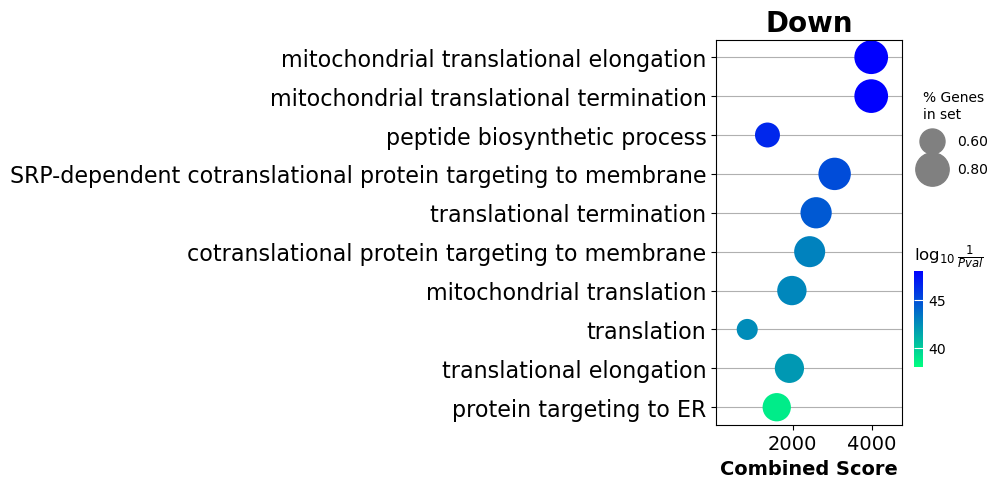

In [23]:
enr_down.res2d.Term = enr_down.res2d.Term.str.split(" \(GO").str[0]
gp.dotplot(enr_down.res2d,
           figsize=(3,5),
           title="Down",
           cmap = plt.cm.winter_r,
           size=5,
           cutoff=0.05)
plt.show()